In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IND115datalabels.csv to IND115datalabels.csv
User uploaded file "IND115datalabels.csv" with length 157565 bytes


In [0]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)



from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
# from utils import get_data, generate_output, guess_human, seed_sequence, get_embeddings, find_closest

In [0]:
data = pd.read_csv('./IND115datalabels.csv')
# data2= pd.read_csv('./IND115data.csv')

In [0]:
diff=data.values[:,0]

ndiff=diff.shape[0]

for i in range(1,ndiff):
  diff[i]=diff[i]-diff[i-1]
  


In [0]:
xm=data.values[:,0]
ym=data.values[:,1]
timesteps=10
n=2

labelstrue=data.values[:,2]

m=xm.shape[0]

ux=np.mean(xm)
uy=np.mean(ym)

rx=np.max(xm)-np.min(xm)
ry=np.max(ym)-np.min(ym)

#m,n=xm.shape

#xm=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(xm.reshape(-1,1))
#ym=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(ym.reshape(-1,1))

xm=(xm-ux)/rx
ym=(ym-uy)/ry

xtmp=np.empty((m,2))
xtmp[:,0]=xm
xtmp[:,1]=ym

xnew=np.array(xtmp[0:timesteps,:]).reshape(1,-1,n)
print(xnew)


for i in range(1,m-timesteps):
  xnew=np.append(xnew,np.array(xtmp[i:i+timesteps,:]).reshape(1,-1,n),axis=0)

print(xnew.shape)


new_m=xnew.shape[0]

# y=ym[:new_m]
y=labelstrue[timesteps:]

y.shape

print(xnew[:5,:,:])
print(y[:5])

[[[ 0.14038742 -0.09404439]
  [ 0.16359232 -0.08098864]
  [ 0.13031737 -0.06352216]
  [ 0.12287428 -0.07199076]
  [ 0.14651702 -0.07181433]
  [ 0.10317201 -0.07887149]
  [ 0.11105292 -0.08398793]
  [ 0.10273418 -0.07798934]
  [ 0.07427533 -0.07922435]
  [ 0.10229635 -0.06334573]]]
(8750, 10, 2)


(8750,)

[[[ 0.14038742 -0.09404439]
  [ 0.16359232 -0.08098864]
  [ 0.13031737 -0.06352216]
  [ 0.12287428 -0.07199076]
  [ 0.14651702 -0.07181433]
  [ 0.10317201 -0.07887149]
  [ 0.11105292 -0.08398793]
  [ 0.10273418 -0.07798934]
  [ 0.07427533 -0.07922435]
  [ 0.10229635 -0.06334573]]

 [[ 0.16359232 -0.08098864]
  [ 0.13031737 -0.06352216]
  [ 0.12287428 -0.07199076]
  [ 0.14651702 -0.07181433]
  [ 0.10317201 -0.07887149]
  [ 0.11105292 -0.08398793]
  [ 0.10273418 -0.07798934]
  [ 0.07427533 -0.07922435]
  [ 0.10229635 -0.06334573]
  [ 0.11937166 -0.07340219]]

 [[ 0.13031737 -0.06352216]
  [ 0.12287428 -0.07199076]
  [ 0.14651702 -0.07181433]
  [ 0.10317201 -0.07887149]
  [ 0.11105292 -0.08398793]
  [ 0.10273418 -0.07798934]
  [ 0.07427533 -0.07922435]
  [ 0.10229635 -0.06334573]
  [ 0.11937166 -0.07340219]
  [ 0.09923155 -0.06952075]]

 [[ 0.12287428 -0.07199076]
  [ 0.14651702 -0.07181433]
  [ 0.10317201 -0.07887149]
  [ 0.11105292 -0.08398793]
  [ 0.10273418 -0.07798934]
  [ 0.07427533

In [0]:
data.shape
print(xnew[:5,:,0])
print(y[:5])

(8760, 2)

[[0.00024512 0.00024512 0.00024512 0.00024512 0.00024512 0.00024512
  0.00024512 0.00024512 0.00024512 0.00024512]
 [0.00024512 0.00024512 0.00024512 0.00024512 0.00024512 0.00024512
  0.00024512 0.00024512 0.00024512 0.00024512]
 [0.00024512 0.00024512 0.00024512 0.00024512 0.00024512 0.00024512
  0.00024512 0.00024512 0.00024512 0.00024512]
 [0.00024512 0.00024512 0.00024512 0.00024512 0.00024512 0.00024512
  0.00024512 0.00024512 0.00024512 0.00024512]
 [0.00024512 0.00024512 0.00024512 0.00024512 0.00024512 0.00024512
  0.00024512 0.00024512 0.00024512 0.00024512]]
[[-0.48997996]
 [-0.50400802]
 [-0.60320641]
 [-0.62324649]
 [-0.68036072]]


In [0]:
X=xnew

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

X_train=X[2000:,:,:]
y_train=y[2000:]
X_test=X[:2000,:,:]
y_test=y[:2000]

X_train.shape

print("Xtrain",X_train[:5,:,:])
#print("ytrain",y_train[:5])

print("Xtest",X_test[:5,:,:])
#print("ytest",y_test[:5])

X_test.shape

(6750, 10, 2)

Xtrain [[[-0.21075094  0.16918779]
  [-0.19542694  0.18365497]
  [-0.16959507  0.18506641]
  [-0.1993674   0.18400783]
  [-0.24183675  0.20112145]
  [-0.25453377  0.21135434]
  [-0.25584726  0.21523578]
  [-0.29919227  0.21523578]
  [-0.31626757  0.20817862]
  [-0.33378071  0.21523578]]

 [[-0.19542694  0.18365497]
  [-0.16959507  0.18506641]
  [-0.1993674   0.18400783]
  [-0.24183675  0.20112145]
  [-0.25453377  0.21135434]
  [-0.25584726  0.21523578]
  [-0.29919227  0.21523578]
  [-0.31626757  0.20817862]
  [-0.33378071  0.21523578]
  [-0.32808894  0.21523578]]

 [[-0.16959507  0.18506641]
  [-0.1993674   0.18400783]
  [-0.24183675  0.20112145]
  [-0.25453377  0.21135434]
  [-0.25584726  0.21523578]
  [-0.29919227  0.21523578]
  [-0.31626757  0.20817862]
  [-0.33378071  0.21523578]
  [-0.32808894  0.21523578]
  [-0.30532186  0.20764933]]

 [[-0.1993674   0.18400783]
  [-0.24183675  0.20112145]
  [-0.25453377  0.21135434]
  [-0.25584726  0.21523578]
  [-0.29919227  0.21523578]
  [-0.3

(2000, 10, 2)

In [0]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam, RMSprop, SGD

from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
model = Sequential()

# timesteps=5


# Recurrent layer 1
model.add(
    LSTM(
        32,input_shape=(timesteps,n),return_sequences=False, dropout=0.1,
        recurrent_dropout=0.1))


# Fully connected layer 2
model.add(Dense(10, activation='tanh'))

# Fully connected layer 3
# model.add(Dense(5, activation='tanh'))
  
# Fully connected layer 4
model.add(Dense(1, activation='sigmoid'))
  
# Dropout for regularization
#model.add(Dropout(0.5))

#rmsprop=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)    #lr=0.001

#model.compile(
#    optimizer=rmsprop, loss='mean_squared_error')


# sgd=SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# model.compile(
  #  optimizer=sgd, loss='mean_squared_error')

# Compile the model
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(
    optimizer=adam, loss='binary_crossentropy')


model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 4,821
Trainable params: 4,821
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.models import load_model
print(X_train.shape)


# Load in model and demonstrate training
# model = load_model('../models/train-embeddings-rnn.h5')
h = model.fit(X_train, y=y_train, epochs = 50, batch_size = 10, 
          validation_data = (X_test, y_test), 
          verbose = 1)

(6750, 10, 2)
Instructions for updating:
Use tf.cast instead.
Train on 6750 samples, validate on 2000 samples
Epoch 1/50
6750/6750 [==============================] - 19s 3ms/step - loss: 0.1996 - val_loss: 0.1337
Epoch 2/50
6750/6750 [==============================] - 14s 2ms/step - loss: 0.1622 - val_loss: 0.1099
Epoch 3/50
6750/6750 [==============================] - 14s 2ms/step - loss: 0.1529 - val_loss: 0.1211
Epoch 4/50
6750/6750 [==============================] - 14s 2ms/step - loss: 0.1470 - val_loss: 0.1127
Epoch 5/50
6750/6750 [==============================] - 13s 2ms/step - loss: 0.1400 - val_loss: 0.1012
Epoch 6/50
6750/6750 [==============================] - 13s 2ms/step - loss: 0.1438 - val_loss: 0.0990
Epoch 7/50
6750/6750 [==============================] - 14s 2ms/step - loss: 0.1334 - val_loss: 0.1027
Epoch 8/50
6750/6750 [==============================] - 14s 2ms/step - loss: 0.1310 - val_loss: 0.0930
Epoch 9/50
6750/6750 [==============================] - 13s 2ms/st

<Figure size 864x360 with 0 Axes>

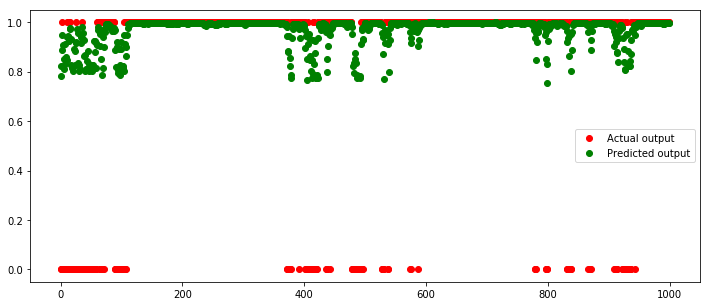

In [0]:
import matplotlib.pyplot as plt

nn=1000
xplot=X_train[:nn,:,:]
yplot=y_train[:nn]
ypredict=[]


for i in range(0,nn):
  ypredict=np.append(ypredict,model.predict(xplot[i,:,:].reshape(1,timesteps,n)))
  
# ypredict=np.append(ypredict,model.predict(xplot))

plt.figure(figsize=(12,5))  

xt= np.arange(0,nn,1)
plt.plot(xt,yplot,'ro',label='Actual output')
plt.plot(xt,ypredict,'go',label='Predicted output')
plt.legend()
# plt.plot(xt,yplot-ypredict,'bo')

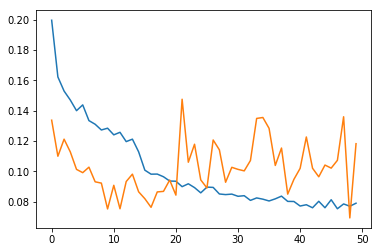

In [0]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [0]:
from sklearn import metrics

thresh=0.9
ylen=len(ypredict)
labelspred=np.empty(ylen)
for i in range(0,ylen):
  if(ypredict[i]>thresh):
    labelspred[i]=1
  else:
    labelspred[i]=0
  
print("Accuracy score ",metrics.accuracy_score(labelstrue[2000:3000], labelspred, normalize=True))
print("Precision score ",metrics.precision_score(labelstrue[2000:3000],labelspred,average=None))
print("Recall score ",metrics.recall_score(labelstrue[2000:3000], labelspred, average=None))
print("f1 score ",metrics.f1_score(labelstrue[2000:3000], labelspred, average=None))

Accuracy score  0.837
Precision score  [0.54385965 0.87471783]
Recall score  [0.3583815  0.93712213]
f1 score  [0.43205575 0.9048453 ]


In [0]:
print('Model Performance: Log Loss and Accuracy on training data')
model.evaluate(X_train, y_train, batch_size = 10)

print('\nModel Performance: Log Loss and Accuracy on validation data')
model.evaluate(X_test,y_test, batch_size = 10)

Model Performance: Log Loss and Accuracy on training data
6750/6750 [==============================] - 5s 777us/step


0.1170252753911471


Model Performance: Log Loss and Accuracy on validation data
2000/2000 [==============================] - 2s 753us/step


0.10483251449186355